In [1]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

## Embeddings capture meaning

In [2]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [3]:
import numpy as np
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

In [4]:
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding.embed_query(
        input_text)
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

In [5]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 1536)
[[-0.00826277  0.00508658 -0.02174906 ... -0.01007297  0.00589482
  -0.02818828]
 [-0.00592906 -0.00941327 -0.01306746 ...  0.00048987  0.00190063
  -0.0305147 ]
 [ 0.00456015 -0.02816371  0.01958299 ... -0.02172817 -0.02047791
  -0.01995149]
 ...
 [ 0.01356723 -0.01726009 -0.00468631 ... -0.0206452   0.00479001
  -0.01565449]
 [ 0.01688784 -0.0071613   0.01817046 ... -0.01377481 -0.00535093
  -0.02968732]
 [ 0.01085435 -0.01503931  0.00882829 ... -0.02962692  0.01494632
  -0.03239033]]


#### Reduce embeddings from 1536 to 2 dimensions for visualization
- We'll use principal component analysis (PCA).
- You can learn more about PCA in [this video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) from the Machine Learning Specialization. 

In [6]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [7]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[-0.2644554  -0.1280931 ]
 [-0.22917821 -0.1360129 ]
 [-0.22699735 -0.12277451]
 [-0.03637213  0.34444356]
 [ 0.05802365  0.33493693]
 [ 0.27870583 -0.1632315 ]
 [ 0.42027361 -0.12926849]]


In [17]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

# from utils import plot_2D
# plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

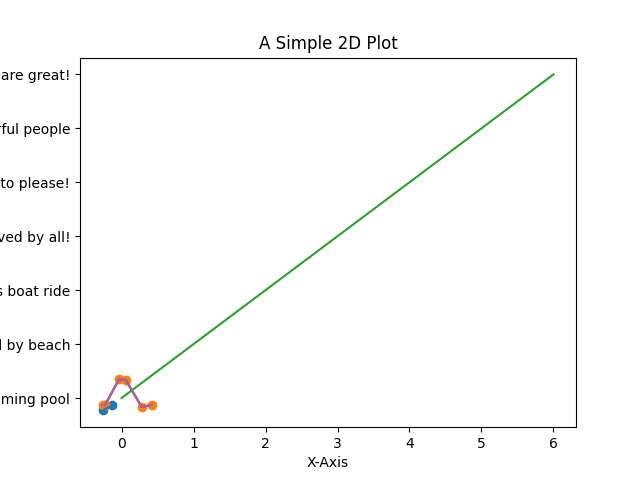

In [18]:

import matplotlib.pyplot as plt

# Example data
x = new_values[:,0]
y = new_values[:,1]

# Creating a simple 2D plot
plt.plot(x, y)

# Adding labels and title
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('A Simple 2D Plot')

# Displaying the plot
plt.show()

#### Embeddings and Similarity
- Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [19]:
in_1 = """He couldn’t desert 
          his post at the power plant."""

in_2 = """The power plant needed 
          him at the time."""

in_3 = """Cacti are able to 
          withstand dry environments.""" 

in_4 = """Desert plants can 
          survive droughts.""" 

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [20]:
embeddings = []
for input_text in input_text_lst_sim:
    emb = embedding.embed_query(
        input_text)
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

In [21]:
from utils import plot_heatmap

y_labels = input_text_lst_sim

# Plot the heatmap
plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

ImportError: cannot import name 'plot_heatmap' from 'utils' (/home/chris/anaconda3/envs/ai-dev/lib/python3.11/site-packages/utils/__init__.py)

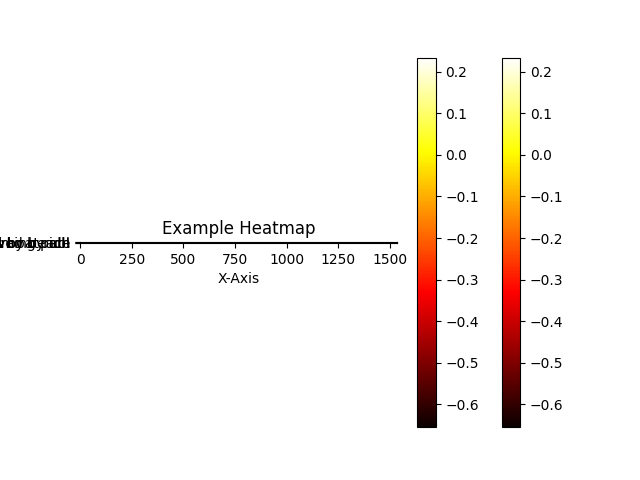

In [23]:
import matplotlib.pyplot as plt

# Example 2D data array
data = embeddings

# Creating a heatmap
plt.imshow(data, cmap='hot', interpolation='nearest')

# Adding a colorbar
plt.colorbar()

# Adding labels and a title
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Example Heatmap')

# Displaying the plot
plt.show()

Note: the heat map won't show everything because there are 768 columns to show.  To adjust the heat map with your mouse:
- Hover your mouse over the heat map.  Buttons will appear on the left of the heatmap.  Click on the button that has a vertical and horizontal double arrow (they look like axes).
- Left click and drag to move the heat map left and right.
- Right click and drag up to zoom in.
- Right click and drag down to zoom out.

#### Compute cosine similarity
- The `cosine_similarity` function expects a 2D array, which is why we'll wrap each embedding list inside another list.
- You can verify that sentence 1 and 2 have a higher similarity compared to sentence 1 and 4, even though sentence 1 and 4 both have the words "desert" and "plant".

In [25]:
import numpy as np

In [29]:
print(np.dot(embeddings_array[0],embeddings_array[1])) 
print(np.dot(embeddings_array[1],embeddings_array[2]))
print(np.dot(embeddings_array[0],embeddings_array[2]))
print(np.dot(embeddings_array[3],embeddings_array[1])) 
print(np.dot(embeddings_array[3],embeddings_array[2]))
print(np.dot(embeddings_array[3],embeddings_array[0]))

0.9112829600466804
0.7320855287964918
0.7331816152818311
0.7627420844705858
0.909218912097008
0.774069109107562


In [27]:
len(embeddings_array[0])

1536